***
# **`Walmart Data Analysis`**
***

## `Details`



### Assignment

**Question:**

*  The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and **the various other factors** to help the business make better decisions. For example, they want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

**Tasks:**
   
* Analyze the provided data and provide insights to the best of your      abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including code and preparation of data.

* Use Python and Pandas to provide basic statistics on the data, produce data visualization with numerical data, show visuals of purchases by other variables. Display relevant statistics and summarize actionable insights that would contribute how to Wal-Mart should market to this audience.

**Deliverables**
 
 * Email results in a report or presentation form by **Friday, January 26th, 2024**

### Data Description

The company collected the transactional data of customers who purchased products from Walmart Stores during Black Friday. The dataset in `walmart_data.csv` has the following features:

`User_ID`

`Product_ID`

`Gender` - sex of a customer

`Age` - age in bins

`Occupation` (masked)

`City_Category` - category of the city [A, B, C]

`Stay_In_Current_City_Years`: number of years a customer stays in their current city

`Marital_Status`

`Product_Category `(masked)

`Purchase` - purchase amount



**Practicalities**

 For simplicity, you may assume that 50% of Walmart's customer base are Male and the other 50% are Female.



### Helpful Links
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
 

## `Setup`


Import necessary packages: 

In [161]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt  
from pyprojroot import here
from matplotlib.ticker import FuncFormatter 
from typing import Union
from IPython.display import Image


In [162]:
# Suppresses scientific notation

pd.options.display.float_format = '{:.0f}'.format

In [163]:
# Monochromatic colorscheme for KC. 
# Using: https://colorkit.co/color-palette-generator/005593-006ebd-0086e8-000b13-00243e-003c68/

kcblue = '#005593'
kcblue2 = '#006ebd'
kcblue3 = '#0086e8'
kcblue3lite = '#afd1de'
kcbluedark = "#00243e"
kcbluelite = '#0072c6'
kcbgcolor = (0.8980392156862745, 0.9254901960784314, 0.9529411764705882)


In [164]:
# Formats large numbers
def format_number(data_value, inx):
    if data_value >= 1_000_000_000:
        formatter = '{:1.1f}B'.format(data_value * 0.000000001)
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value * 0.001)
    elif data_value >= 1:
        formatter = '{:1.0f}'.format(data_value)
    else:
        formatter = '{:1.0f}'.format(data_value)  
    return formatter


# Wrapper function for plt.bar(), with KC colors
def bar_chart(x, y, series, title, x_label, y_label, format_off=False):
    ax = plt.subplot()
    plt.bar(x, y, 0.4, color=kcblue)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(x, series);

    ax.set_facecolor(kcbgcolor)
    if format_off:
        pass
    else:
        ax.yaxis.set_major_formatter(format_number)


# Wrapper function for plt.bar() to make stacked bar graphs
def stacked_bar(x, top_y, bot_y, series, top_label, bot_label, title, x_label,
                y_label ):
    ax = plt.subplot()
    ax.bar(x, top_y, 0.4,bottom=bot_y, color=[kcblue3], label=top_label)
    ax.bar(x, bot_y, 0.4, color=[kcblue], label=bot_label)
    
    ax.set_facecolor(kcbgcolor)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(x, series);

    plt.legend()

    ax.yaxis.set_major_formatter(format_number)


# Wrapper for plt.pie() with KC colors
def kc_pie_chart(wedges, labels, title):
    plt.title(title)

    plt.pie(wedges, labels=labels, autopct='%1.1f%%', 
        wedgeprops={"linewidth": 1, "edgecolor":"black", "linewidth":.25, 'antialiased': True},
        textprops={"color":"black", "fontsize":12.5},
        colors=[kcbgcolor, kcbluelite]
    );


# Function counts occurrences of a specific value in a DataFrame; optionally filters as well
def count_occurrences(
    primary_df: pd.DataFrame, 
    count_column: str,
    filter_column: str = None,
    filter_value: Union[str, int, float] = None
) -> pd.DataFrame:
    
    """
    Counts all occurrences of a given value in a filtered DataFrame column.
    """

    if filter_column is not None and filter_value is not None:
        filtered_df = primary_df[primary_df[filter_column] == filter_value]
    else:
        return primary_df[count_column].value_counts().reset_index()
    
    filtered_df = primary_df[primary_df[filter_column] == filter_value ]
    answer = filtered_df[count_column].value_counts().reset_index()
    return answer

# Bar graph function for comparing two variables along the x-axis
def side_bar(y1, y2, label1, label2, title:str, ylabel:str, xlabel:str, x_series):

    ind = np.arange(len(x_series))
    width = 0.3
    ax = plt.subplot()
    pd.options.display.float_format = '{:.2f}'.format

    plt.bar(ind, y1, width, label=label1, color=kcblue3)
    plt.bar(ind + width, y2, width, label=label2, color=kcblue)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # plt.yscale('log')

    plt.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(format_number)
    ax.set_facecolor(kcbgcolor)

    plt.legend()
    plt.xticks(ind + width / 2,  x_series);

Import Walmart sales data for Black Friday as `bf_sales`:

In [165]:
bf_sales = pd.read_csv('datasets/walmart_data.csv', sep=',')
bf_sales.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [166]:
bf_sales['Purchase'].describe()

count   550068
mean      9264
std       5023
min         12
25%       5823
50%       8047
75%      12054
max      23961
Name: Purchase, dtype: float64

## `Cleaning Data`

I want to ensure that there are no duplicate entries. I've also gone back and decided to make the columns lower case to make things easier after working with the data as is.

In [167]:
print(bf_sales.shape)
bf_sales.drop_duplicates
# Compare two shapes to see if any rows were dupes
print(bf_sales.shape)

(550068, 10)
(550068, 10)


In [168]:
# make columns lowercase
bf_sales.columns = [x.lower() for x in bf_sales.columns]
bf_sales.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [169]:
bf_sales[['user_id', 'product_id', 'occupation', 
          'marital_status', 'product_category']].apply(str)

user_id             0         1000001\n1         1000001\n2       ...
product_id          0         P00069042\n1         P00248942\n2   ...
occupation          0         10\n1         10\n2         10\n3   ...
marital_status      0         0\n1         0\n2         0\n3      ...
product_category    0          3\n1          1\n2         12\n3   ...
dtype: object

Checking that there are no unexpected unique values in the categorical columns (example: there's only 'M' and 'F' for gender, and no unexpected 'm' or 'f')

In [170]:
categor_cols = ['gender', 'age', 'occupation', 'stay_in_current_city_years', 
                'marital_status', 'product_category']

for c in categor_cols:
    print( c )
    unique_values = bf_sales[c].unique()
    print(np.sort(unique_values))

# Making sure there aren't any missing values (ensuring each col has the same number of data)
print('\n Counts: \n\n', bf_sales.count())



gender
['F' 'M']
age
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
occupation
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
stay_in_current_city_years
['0' '1' '2' '3' '4+']
marital_status
[0 1]
product_category
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

 Counts: 

 user_id                       550068
product_id                    550068
gender                        550068
age                           550068
occupation                    550068
city_category                 550068
stay_in_current_city_years    550068
marital_status                550068
product_category              550068
purchase                      550068
dtype: int64


### Pulling categorical data

I want to pull some columns' data into lists (series)

In [171]:
user_ids = bf_sales['user_id'].drop_duplicates()
occupations = bf_sales['occupation'].drop_duplicates()
cities = bf_sales['city_category'].drop_duplicates()
ages = bf_sales['age'].drop_duplicates()
sales_total = bf_sales['purchase'].sum()

# Get an idea of how many unique points there are
print('Num of IDS: ', user_ids.count(), '\n', 'Num of Occupations: ', occupations.count(), 
      '\n', 'Num of Cities: ', cities.count(),  '\n', 'Num of Age Brackets: ', ages.count(),
      '\n', 'Total Sales: ', sales_total)




Num of IDS:  5891 
 Num of Occupations:  21 
 Num of Cities:  3 
 Num of Age Brackets:  7 
 Total Sales:  5095812742


In [172]:
ages = ages.sort_values()
ages 

0      0-17
70    18-25
5     26-35
18    36-45
6     46-50
14    51-55
4       55+
Name: age, dtype: object

## `Subset Creation`

### user_data:

I notice that there are multiple items bought per user. I can make a new data frame that includes only user information:

In [173]:
user_data = bf_sales[['user_id',  'gender', 'age', 'occupation', 'city_category',
                       'stay_in_current_city_years', 'marital_status']].drop_duplicates()
print(user_data.shape)
user_data.head()

(5891, 7)


,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


Upon looking at the head of the data, it appears that the data is already organized by `User_ID`. Therefore, one might assume that user 10000001 has purchased only four items.

I found this to be misleading! I have the dataset up in Excel as well for easier visual exploration, and saw that there are many more entries per ID than it might seem at first glace. I confirmed that by getting a count of each entry per user_ID:

In [174]:
user_items_pur = bf_sales[['user_id', 'product_id']].groupby('user_id', as_index=False).agg('count')
# To confirm that the number of users remains consistent
print(user_items_pur.shape)
user_items_pur.columns = ['user_id', 'num_items']
user_items_pur

(5891, 2)


,user_id,num_items
0,1000001,35
1,1000002,77
2,1000003,29
3,1000004,14
4,1000005,106
...,...,...
5886,1006036,514
5887,1006037,122
5888,1006038,12
5889,1006039,74


### user_data_items

Merging this `user_items_pur` with the `user_data`:

In [175]:
user_data_items = pd.merge(user_data, user_items_pur)
user_data_items

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items
0,1000001,F,0-17,10,A,2,0,35
1,1000002,M,55+,16,C,4+,0,77
2,1000003,M,26-35,15,A,3,0,29
3,1000004,M,46-50,7,B,2,1,14
4,1000005,M,26-35,20,A,1,1,106
...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,20
5887,1004871,M,18-25,12,C,2,0,12
5888,1004113,M,36-45,17,C,3,0,20
5889,1005391,M,26-35,7,A,0,0,7


In [176]:
# Confirming there are still consistent amounts of items 

print(user_data_items['num_items'].describe())
print('\nNumber of items sold: ' , user_data_items['num_items'].sum())

count   5891
mean      93
std      107
min        6
25%       26
50%       54
75%      117
max     1026
Name: num_items, dtype: float64

Number of items sold:  550068


I want to create a data frame for users and their sales, and then group by the user to get the total amount of purchases per user ID

In [177]:
user_sales_grouped = (
    bf_sales[['user_id', 'purchase']]
    .groupby('user_id')['purchase']
    .sum()
    .reset_index()
)

user_sales_grouped

,user_id,purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


In [178]:
# After summing, verifying that the total sales remain the same as before
print(user_sales_grouped['purchase'].sum())
print(sales_total)


5095812742
5095812742


In [179]:
# merge user_sales_grouped with user_data_items
user_data_items = pd.merge(user_data_items, user_sales_grouped)
user_data_items


,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001
...,...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,20,140990
5887,1004871,M,18-25,12,C,2,0,12,108545
5888,1004113,M,36-45,17,C,3,0,20,213550
5889,1005391,M,26-35,7,A,0,0,7,60182


In [180]:
# Verifying the purchase amount in user_data_items matches the PA in bf_sales:
print('user_data_items: ' , user_data_items['purchase'].sum())
print('bf_sales:        ' , bf_sales['purchase'].sum())

user_data_items:  5095812742
bf_sales:         5095812742


### item_data

A separate data frame was made for the item data. After removing duplicates, it was found that there are 3631 unique items in the dataset, which are split into 20 categories.

In [181]:
bf_sales.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [182]:
bf_sales.shape

(550068, 10)

In [183]:
item_data = bf_sales[['product_id', 'product_category']].drop_duplicates().reset_index()
item_data = item_data.drop('index', axis=1)
unique_values = item_data['product_category'].unique()
print('Number of Product Categories: ', len(unique_values))
item_data

Number of Product Categories:  20


,product_id,product_category
0,P00069042,3
1,P00248942,1
2,P00087842,12
3,P00085442,12
4,P00285442,8
...,...,...
3626,P00375436,20
3627,P00372445,20
3628,P00370293,19
3629,P00371644,20


***
# **`Data Visualization`**
***

## `Distribution of Spending`

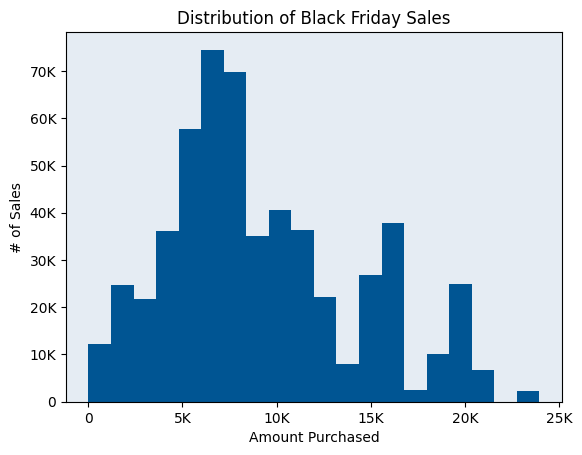

In [184]:
ax = plt.subplot()
plt.hist(bf_sales['purchase'], bins=20, color=kcblue)
plt.title('Distribution of Black Friday Sales')
plt.xlabel('Amount Purchased')
plt.ylabel('# of Sales')

ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.set_facecolor(kcbgcolor)

plt.savefig('results/distribution_sales_hist.png')



## `Age`

### Sales by Age Bracket

In [185]:
sales_age_grouped = (
    user_data_items[['age', 'purchase']]
    .groupby('age')['purchase']
    .sum()
    .reset_index()
)
# Verifying purchase amount remains consistent
print(sales_age_grouped['purchase'].sum())
sales_age_grouped

5095812742


,age,purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


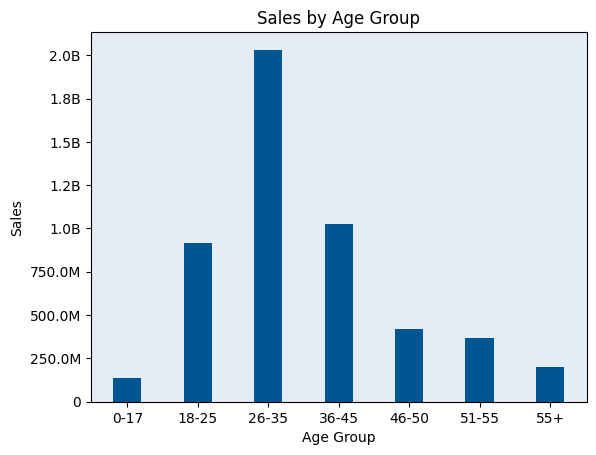

In [186]:
bar_chart(range(len(sales_age_grouped)), sales_age_grouped['purchase'], ages, "Sales by Age Group", "Age Group", "Sales")
plt.savefig('results/sales_by_age_group_bar.png')

### Female Spending by Age


In [187]:
fem_age_sales_grouped = (
    user_data_items[user_data_items['gender'] == 'F' ]
    [['gender', 'age', 'purchase']]
    .groupby('age')['purchase']
    .sum()
    .reset_index()
)
fem_age_sales_grouped.insert(0, 'gender', 'F')
fem_age_sales_grouped



,gender,age,purchase
0,F,0-17,42385978
1,F,18-25,205475842
2,F,26-35,442976233
3,F,36-45,243438963
4,F,46-50,116706864
5,F,51-55,89465997
6,F,55+,45782765


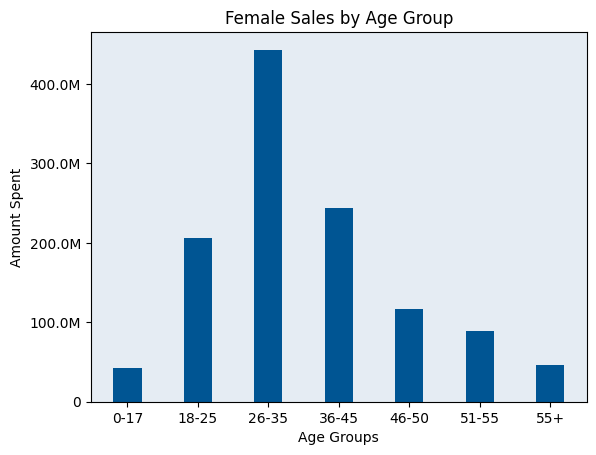

In [188]:
bar_chart(range(len(fem_age_sales_grouped)), fem_age_sales_grouped['purchase'],
          ages, "Female Sales by Age Group", "Age Groups", "Amount Spent")

plt.savefig('results/sales_age_group_fem_bar.png')


### Male Spending by Age

In [189]:
male_age_sales_grouped = (
    user_data_items[user_data_items['gender'] == 'M' ]
    [['gender', 'age', 'purchase']]
    .groupby('age')['purchase']
    .sum()
    .reset_index()
)
male_age_sales_grouped.insert(0, 'gender', 'M')
male_age_sales_grouped


,gender,age,purchase
0,M,0-17,92527205
1,M,18-25,708372833
2,M,26-35,1588794345
3,M,36-45,783130921
4,M,46-50,304136539
5,M,51-55,277633647
6,M,55+,154984610


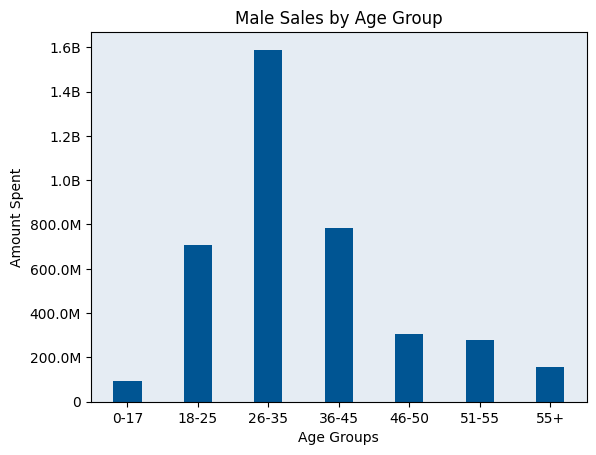

In [190]:
bar_chart(range(len(male_age_sales_grouped)), male_age_sales_grouped['purchase'],
          ages, "Male Sales by Age Group", "Age Groups", "Amount Spent")

plt.savefig('results/sales_age_group_male_bar.png')

### Sales by Gender and Age, Grouped Bar Chart
This was an experimental chart; decided not to go with it and choose the stacked bar instead. 


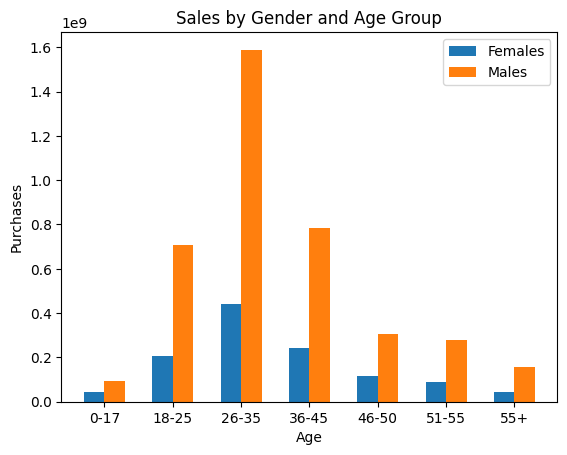

In [191]:
ind = np.arange(len(ages))
width = 0.3

pd.options.display.float_format = '{:.2f}'.format

plt.bar(ind, fem_age_sales_grouped['purchase'], width, label='Females')
plt.bar(ind + width, male_age_sales_grouped['purchase'], width, label='Males')
plt.title('Sales by Gender and Age Group')
plt.ylabel('Purchases')
plt.xlabel('Age')
plt.legend()
# plt.yscale('log')
plt.xticks(ind + width / 2,  ages);

### Sales by Gender and Age, Stacked Bar Chart

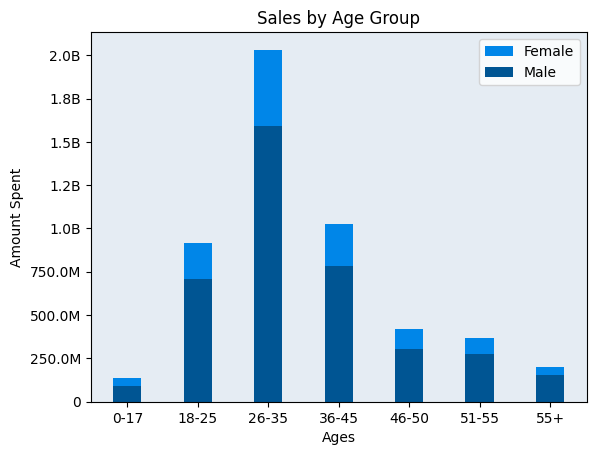

In [192]:
stacked_bar(range(len(fem_age_sales_grouped)), fem_age_sales_grouped['purchase'], 
            male_age_sales_grouped['purchase'], ages, "Female", "Male", "Sales by Age Group", "Ages", "Amount Spent" ) 
plt.savefig('results/sales_age_group_bar_stacked.png')

## `Gender`

### Female Spending Distribution

In [193]:
fem_sales = user_data_items[user_data_items['gender'] == 'F'][['user_id', 'num_items', 'purchase']]
fem_sales

,user_id,num_items,purchase
0,1000001,35,334093
5,1000006,47,379930
9,1000010,223,2169510
10,1000011,70,557023
15,1000016,22,150490
...,...,...,...
5879,1000455,14,139887
5880,1000527,12,86847
5882,1000703,12,102328
5885,1004293,25,276411


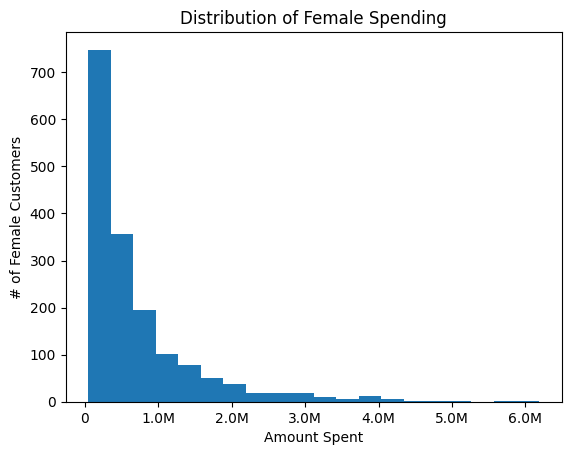

In [194]:
ax = plt.subplot()
plt.hist(fem_sales['purchase'], bins=20)
plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(format_number)
plt.title('Distribution of Female Spending')
plt.ylabel('# of Female Customers')
plt.xlabel('Amount Spent')
plt.show()

### Male Spending Distribution

In [195]:
male_sales = user_data_items[user_data_items['gender'] == 'M'][['user_id', 'num_items', 'purchase']]
male_sales.describe()

,user_id,num_items,purchase
count,4225.00,4225.00,4225.00
mean,1002984.72,98.05,925344.40
std,1718.96,111.04,985830.10
min,1000002.00,6.00,49288.00
25%,1001507.00,27.00,258589.00
50%,1002987.00,58.00,578540.00
75%,1004439.00,123.00,1215237.00
max,1006040.00,1026.00,10536909.00


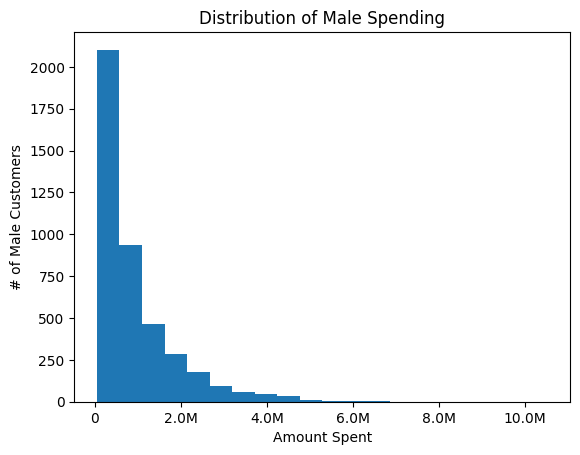

<Figure size 640x480 with 0 Axes>

In [196]:
ax = plt.subplot()
plt.hist(male_sales['purchase'], bins=20);
plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(format_number)
plt.title('Distribution of Male Spending')
plt.ylabel('# of Male Customers')
plt.xlabel('Amount Spent')
plt.show()

plt.savefig('results/dist_sales_male_hist1')

### Percentage of Male to Female Customers

In [197]:
num_fm = (
    user_data_items[['gender', 'user_id']]
    .groupby('gender')['user_id']
    .count()
    .reset_index()
) 

num_fm.columns = ['gender', 'num_users']

num_fm

,gender,num_users
0,F,1666
1,M,4225


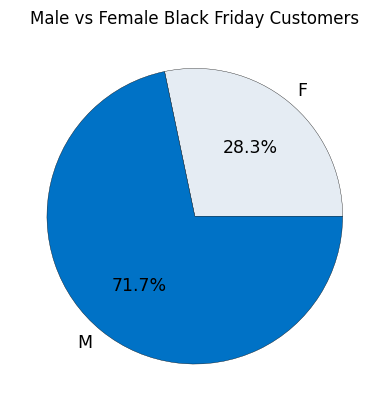

In [198]:
kc_pie_chart(num_fm['num_users'], num_fm['gender'], "Male vs Female Black Friday Customers")
plt.savefig('results/male_fem_pie.png')

### Spending by Gender Pie

In [199]:
gen_tot_purchase = (
    user_data_items[['gender', 'purchase']]
    .groupby('gender')['purchase']
    .sum()
    .reset_index()
)

gen_tot_purchase

,gender,purchase
0,F,1186232642
1,M,3909580100


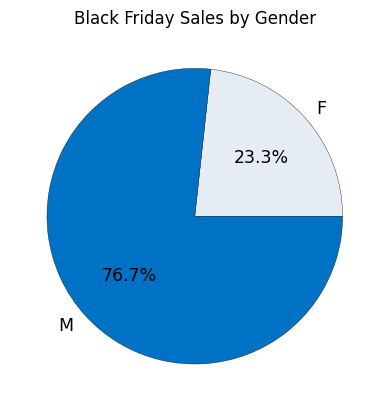

In [200]:
kc_pie_chart(gen_tot_purchase['purchase'], gen_tot_purchase['gender'], "Black Friday Sales by Gender")
plt.savefig('results/sales_gender_pie.png')

## `Marital Status`

### Customers by Marital Status

In [201]:
users_marital_stat = user_data_items['marital_status'].value_counts().reset_index()

users_marital_stat['marital_status'].replace({0: 'Unmarried'}, inplace=True)
users_marital_stat['marital_status'].replace({1 : 'Married'}, inplace=True)

users_marital_stat = users_marital_stat.sort_values(by='marital_status')

# Verifying numbers
print(users_marital_stat['count'].sum())
users_marital_stat


5891


,marital_status,count
1,Married,2474
0,Unmarried,3417


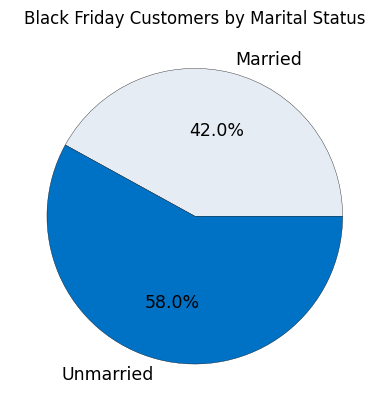

In [202]:
kc_pie_chart(users_marital_stat['count'], users_marital_stat['marital_status'],
             "Black Friday Customers by Marital Status")

plt.savefig('results/marital_users_pie.png')

### Customers by Marital Status and Gender

In [203]:
# Group by gender and marital status, count
marital_status_gender = (
    user_data_items[['gender', 'marital_status']] 
    .groupby(['gender', 'marital_status'])
    .size()
    .reset_index(name='count')
)

# Relabel values
marital_status_gender['gender'].replace({'F': 'Female'}, inplace=True)
marital_status_gender['gender'].replace({'M': 'Male'}, inplace=True)

marital_status_gender['marital_status'].replace({0: 'Unmarried'}, inplace=True)
marital_status_gender['marital_status'].replace({1 : 'Married'}, inplace=True)

# Create new column for labels

marital_status_gender['label'] = (
    marital_status_gender['marital_status'] + ' '
      + marital_status_gender['gender'].astype(str)
)


marital_status_gender

,gender,marital_status,count,label
0,Female,Unmarried,947,Unmarried Female
1,Female,Married,719,Married Female
2,Male,Unmarried,2470,Unmarried Male
3,Male,Married,1755,Married Male


#### Chart for Customers by Gender chart

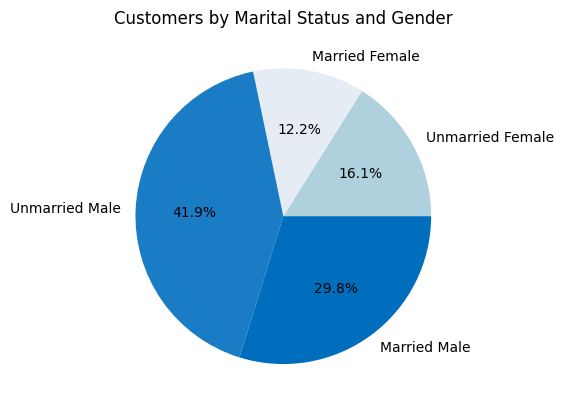

In [204]:
# This chart matches the pie chart for percentages of male to female users

plt.pie(marital_status_gender['count'], labels=marital_status_gender['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, '#1a7cc4', kcblue2 ));

plt.title('Customers by Marital Status and Gender');
plt.savefig('results/marital_gender_users_pie_2.png')


In [205]:
marital_status_gender

,gender,marital_status,count,label
0,Female,Unmarried,947,Unmarried Female
1,Female,Married,719,Married Female
2,Male,Unmarried,2470,Unmarried Male
3,Male,Married,1755,Married Male


#### Chart for plain Customers by Marital Status chart

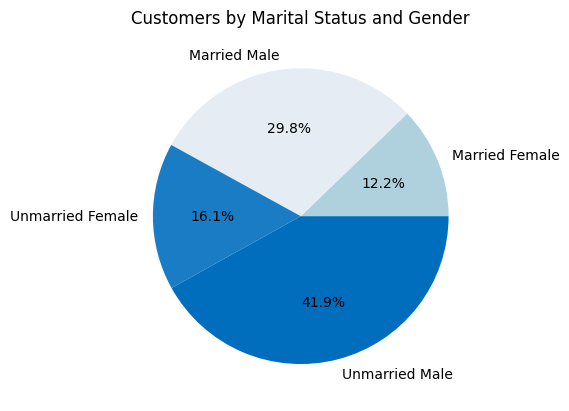

In [206]:
# This chart corresponds to the plain customers by marital status chart
marital_status_gender = marital_status_gender.sort_values(by='marital_status')

plt.pie(marital_status_gender['count'], labels=marital_status_gender['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, '#1a7cc4', kcblue2 ));

plt.title('Customers by Marital Status and Gender') ;

plt.savefig('results/marital_gender_users_pie_1.png')


### Purchases by Marital Status

In [207]:
marital_total_pur = (
    user_data_items[['marital_status', 'purchase']]
    .groupby('marital_status')['purchase']
    .sum()
    .reset_index()
)

marital_total_pur['marital_status'].replace(0, 'Unmarried', inplace=True)
marital_total_pur['marital_status'].replace(1, 'Married', inplace=True)
marital_total_pur = marital_total_pur.sort_values(by='purchase')

#Verifying numbers
print(marital_total_pur['purchase'].sum())
marital_total_pur

5095812742


,marital_status,purchase
1,Married,2086885295
0,Unmarried,3008927447


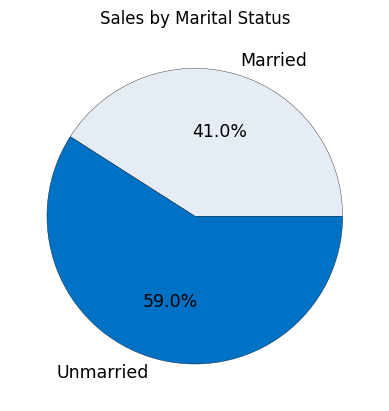

In [208]:
kc_pie_chart(marital_total_pur['purchase'], marital_total_pur['marital_status'], "Sales by Marital Status")

plt.savefig('results/sales_marital_pie.png') 

### Purchases by Marital Status and Gender

In [209]:
marriage_gen_sales = (
    user_data_items[['gender', 'marital_status', 'purchase']]
    .groupby(['gender', 'marital_status'])['purchase']
    .sum()
    .reset_index()
)


marriage_gen_sales['gender'].replace({'F': 'Female'}, inplace=True)
marriage_gen_sales['gender'].replace({'M': 'Male'}, inplace=True)

marriage_gen_sales['marital_status'].replace({0: 'Unmarried'}, inplace=True)
marriage_gen_sales['marital_status'].replace({1 : 'Married'}, inplace=True)

marriage_gen_sales['label'] = marriage_gen_sales['marital_status'] + ' ' + marriage_gen_sales['gender'].astype(str)

marriage_gen_sales = marriage_gen_sales.sort_values(by='marital_status')
marriage_gen_sales

,gender,marital_status,purchase,label
1,Female,Married,502078515,Married Female
3,Male,Married,1584806780,Married Male
0,Female,Unmarried,684154127,Unmarried Female
2,Male,Unmarried,2324773320,Unmarried Male


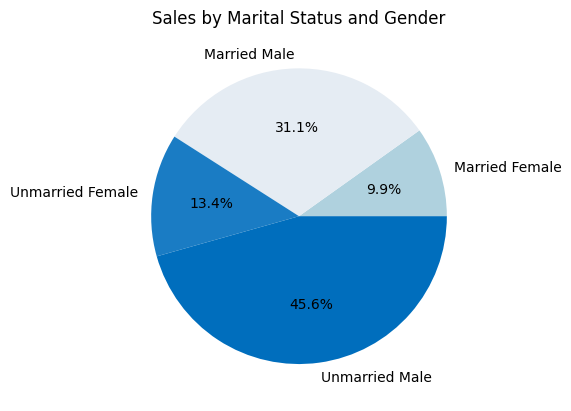

In [210]:
plt.pie(marriage_gen_sales['purchase'], labels=marriage_gen_sales['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, '#1a7cc4', kcblue2 ));

plt.title('Sales by Marital Status and Gender');
plt.savefig('results/marital_gender_sales_pie.png')

## `City Category`

### Sales by City Category and Gender

##### `Sales by City Category and Gender, Grouped Bar`

In [211]:
city_pur_gender = (
    user_data_items[['gender', 'city_category','purchase']]
    .groupby(['gender', 'city_category'])['purchase']
    .sum()
    .reset_index()
)

city_pur_gender

,gender,city_category,purchase
0,F,A,306329915
1,F,B,493617008
2,F,C,386285719
3,M,A,1010141746
4,M,B,1621916597
5,M,C,1277521757


In [212]:
fem_city_sales = city_pur_gender[city_pur_gender['gender'] == 'F']['purchase']
male_city_sales = city_pur_gender[city_pur_gender['gender'] == 'M']['purchase']

fem_city_sales

0    306329915
1    493617008
2    386285719
Name: purchase, dtype: int64

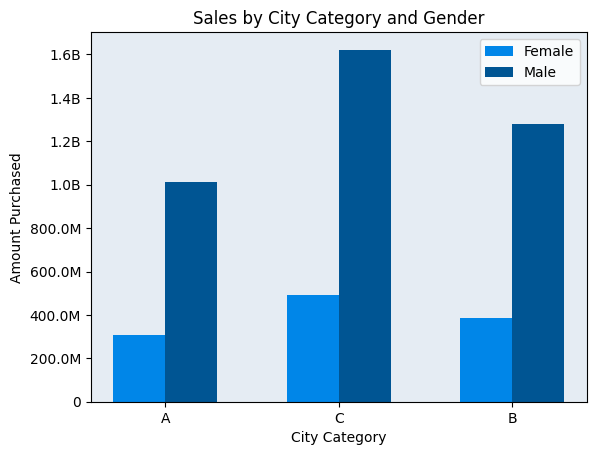

In [213]:
side_bar(fem_city_sales,
         male_city_sales,
         "Female", "Male",
         "Sales by City Category and Gender",
         "Amount Purchased",
         "City Category",
         cities)

plt.savefig('results/sales_by_city_gender_bar.png')

##### `Sales by City Category and Gender, Stacked Bar`

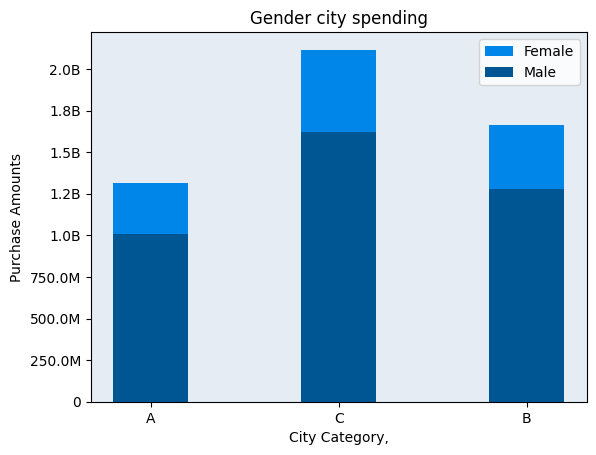

In [214]:
stacked_bar(range(len(cities)), fem_city_sales, male_city_sales,
            cities, 'Female', 'Male', "Gender city spending", 'City Category,', "Purchase Amounts")

plt.savefig('results/sales_by_city_genders_bar.png')

### Total Sales by City Category

In [215]:
city_pur_total = city_pur_gender.groupby('city_category')['purchase'].sum().reset_index()

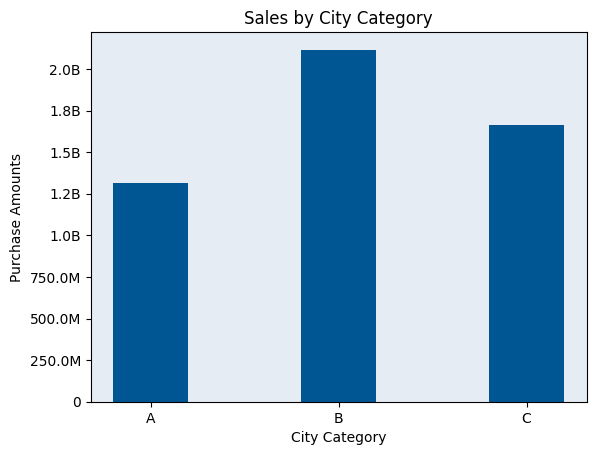

In [216]:
bar_chart(range(len(city_pur_total)), city_pur_total['purchase'], city_pur_total['city_category'],
          "Sales by City Category", 
          "City Category",
          "Purchase Amounts")

plt.savefig('results/sales_by_city_bar.png')

## `Occupation`

### Occupation Setup

In [217]:
# Dataframe for Female number of users and purchases
male_users_occup = (
    user_data_items[user_data_items['gender'] == 'M']
    .groupby('occupation')
    .agg({'purchase': 'sum', 'gender': 'count'})
    .reset_index()
)

male_users_occup.columns = ['occupation', 'male_purchase', 'male_users']
male_users_occup = male_users_occup.sort_values(by='male_users', ascending=False)


# Dataframe for Female number of users and purchases
fem_users_occup = (
    user_data_items[user_data_items['gender'] == 'F']
    .groupby('occupation')
    .agg({'purchase': 'sum', 'gender': 'count'})
    .reset_index()
)

fem_users_occup.columns = ['occupation', 'fem_purchase', 'fem_users']
fem_users_occup = fem_users_occup.sort_values(by='fem_users', ascending=False)


# Combining the two ^^^
all_occup = pd.merge(male_users_occup, fem_users_occup, 
                           on='occupation', how='outer')
all_occup['total_users'] = all_occup['fem_users'] + all_occup['male_users']
all_occup['total_purchase'] = all_occup['fem_purchase'] + all_occup['male_purchase']

In [218]:
all_occup_user_sort = all_occup.sort_values(by='total_users', ascending=False)
all_occup_purchase_sort = all_occup.sort_values(by='total_purchase', ascending=False)

### All Users by Occupation and Gender

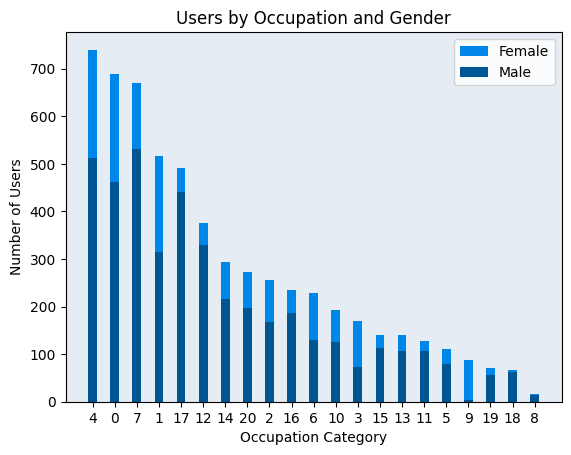

In [219]:
stacked_bar(range(len(all_occup)), all_occup_user_sort['fem_users'],
            all_occup_user_sort['male_users'], all_occup_user_sort['occupation'],
            'Female', 'Male',
            'Users by Occupation and Gender',
            'Occupation Category', 'Number of Users'
            )

plt.savefig('results/occup_all_sales_gender_CORRECTED.png')

### All Sales by Occupation and Gender

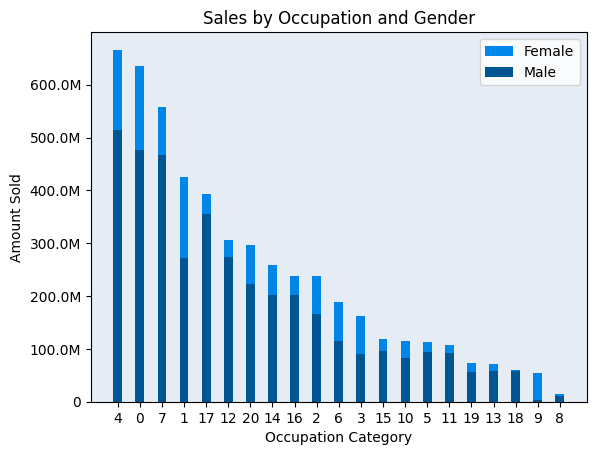

In [220]:
stacked_bar(range(len(all_occup)), all_occup_purchase_sort['fem_purchase'],
            all_occup_purchase_sort['male_purchase'], all_occup_purchase_sort['occupation'],
            'Female', 'Male',
            'Sales by Occupation and Gender',
            'Occupation Category', 'Amount Sold'
            )

#### This was incorrect!!!! 
This is just both female and male data descending but not as it relates to the occupation. Unfortunately this is the one that got added to the presentation 

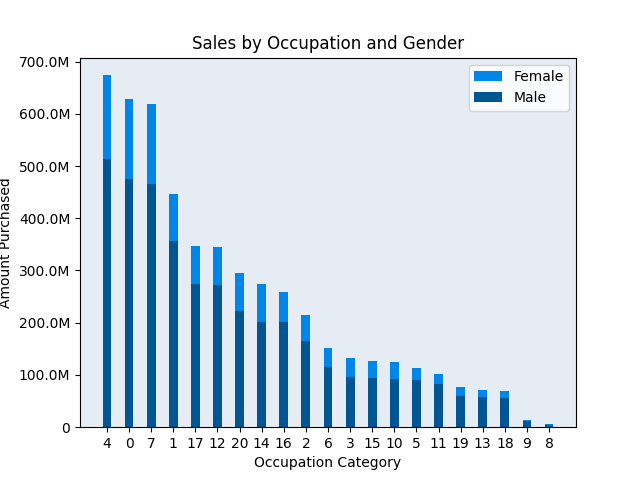

In [221]:
Image('results/occup_all_sales_gender.png')

### All Users by Occupation

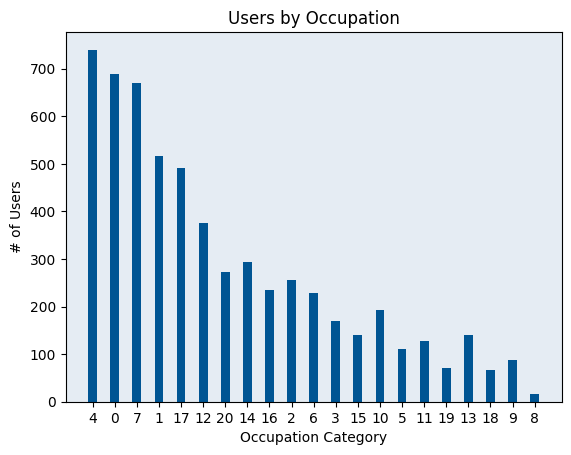

In [222]:
bar_chart(range(len(all_occup_purchase_sort)),all_occup_purchase_sort['total_users'], 
         all_occup_purchase_sort['occupation'], "Users by Occupation", "Occupation Category", "# of Users" )

plt.savefig('results/occup_all_users_bar.png')

### All Sales by Occupation

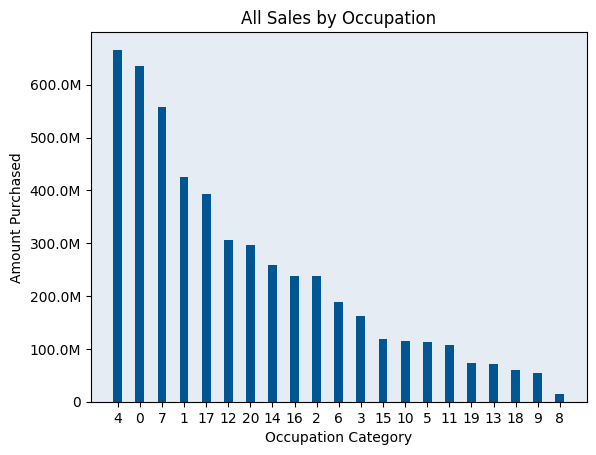

In [223]:
bar_chart(range(len(all_occup_purchase_sort)), all_occup_purchase_sort['total_purchase'],
          all_occup_purchase_sort['occupation'], "All Sales by Occupation", 
          'Occupation Category', 'Amount Purchased') 

plt.savefig('results/occup_all_sales.png')

### Female Users by Occupation

In [224]:
fem_occup_user_sort = all_occup_user_sort.sort_values(by='fem_users', ascending=False)

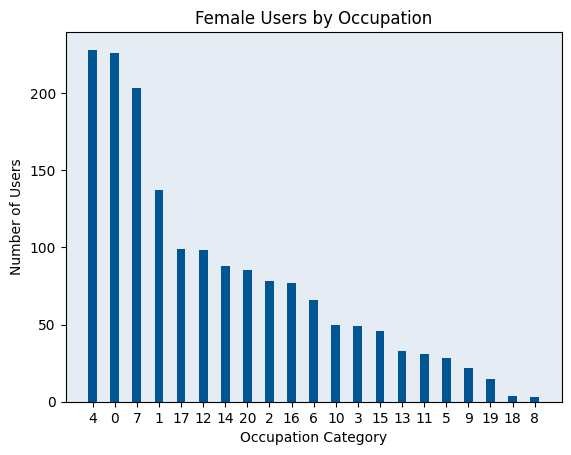

In [225]:
bar_chart(range(len(all_occup_user_sort)), fem_occup_user_sort['fem_users'],
          all_occup_user_sort['occupation'], 
          'Female Users by Occupation',
          'Occupation Category',
          'Number of Users')

plt.savefig('results/occup_fem_users.png')

### Female Sales by Occupation

In [226]:
fem_occup_pur_sort = all_occup_user_sort.sort_values(by='fem_purchase', ascending=False)

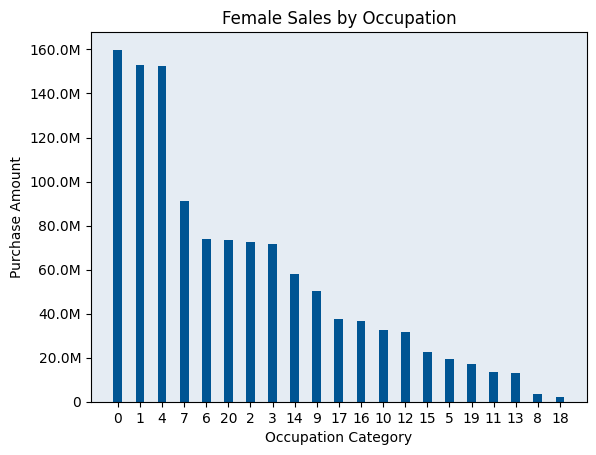

In [227]:
bar_chart(range(len(fem_occup_pur_sort)), fem_occup_pur_sort['fem_purchase'],
          fem_occup_pur_sort['occupation'], 
          'Female Sales by Occupation',
          'Occupation Category',
          'Purchase Amount')

plt.savefig('results/occup_fem_sales.png')

### Male Users by Occupation

In [228]:
male_occup_user_sort = all_occup_user_sort.sort_values(by='male_users', ascending=False)


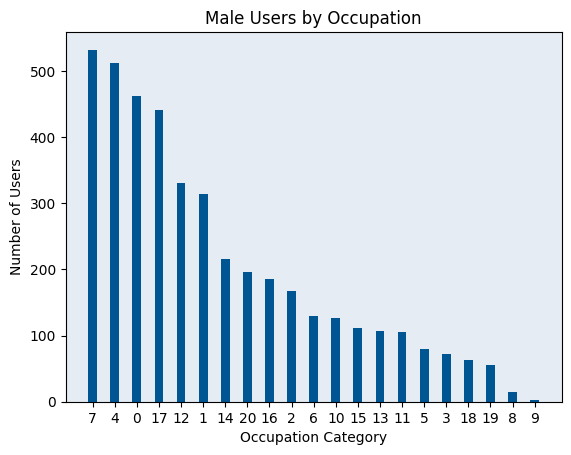

In [229]:
bar_chart(range(len(male_occup_user_sort)), male_occup_user_sort['male_users'],
          male_occup_user_sort['occupation'], 
          'Male Users by Occupation',
          'Occupation Category',
          'Number of Users')

plt.savefig('results/occup_fem_sales.png')


### Male Sales by Occupation

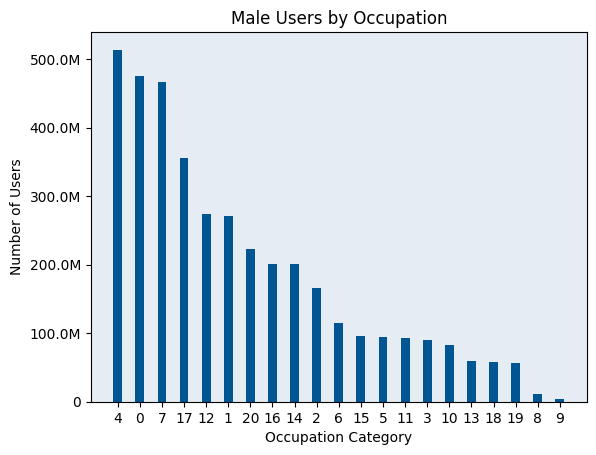

In [230]:
male_occup_pur_sort = all_occup_user_sort.sort_values(by='male_purchase', ascending=False)

bar_chart(range(len(male_occup_pur_sort)), male_occup_pur_sort['male_purchase'],
          male_occup_pur_sort['occupation'], 
          'Male Users by Occupation',
          'Occupation Category',
          'Number of Users')

plt.savefig('results/occup_fem_sales.png')


## `Products` TODO: Refine

In [231]:
all_sold_products = bf_sales[['product_id', 'product_category']]


In [232]:
popular_products = all_sold_products.groupby('product_id', as_index=False).count()
popular_products.columns = ['product_id', 'num_sold']
popular_products_sort = popular_products.sort_values(by='num_sold').reset_index()
popular_products_sort = popular_products_sort.drop('index', axis=1)
popular_products_sort


,product_id,num_sold
0,P00306942,1
1,P00309642,1
2,P00309042,1
3,P00348142,1
4,P00308042,1
...,...,...
3626,P00057642,1470
3627,P00112142,1562
3628,P00110742,1612
3629,P00025442,1615


In [233]:
popular_products_sort = pd.merge(popular_products_sort, item_data[['product_id', 'product_category']])

In [234]:
top_five_products = popular_products_sort.tail(5)
top_five_products = top_five_products.sort_values(ascending=False, by='num_sold')
top_five_products

,product_id,num_sold,product_category
3630,P00265242,1880,5
3629,P00025442,1615,1
3628,P00110742,1612,1
3627,P00112142,1562,1
3626,P00057642,1470,1


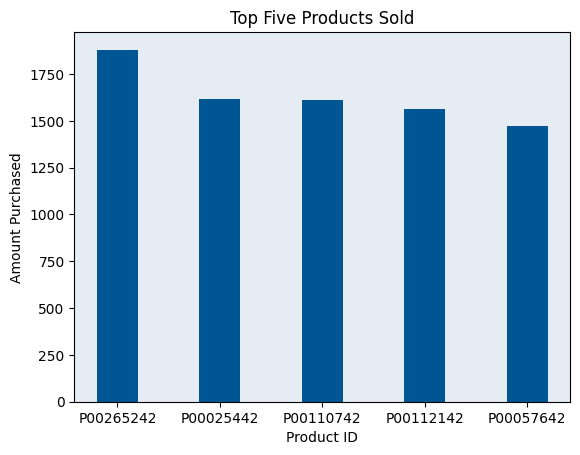

In [235]:
bar_chart(range(len(top_five_products)), top_five_products['num_sold'],
          top_five_products['product_id'], "Top Five Products Sold", "Product ID",
          "Amount Purchased", format_off = True)

plt.savefig('results/top_five_products_bar.png')

In [236]:
fem_test = count_occurrences(bf_sales, 'product_category', 'gender', "F")
fem_test


,product_category,count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658
5,11,4739
6,6,4559
7,4,3639
8,16,2402
9,12,1532


In [237]:
fem_items = bf_sales[bf_sales['gender'] == 'F' ]

fem_items = fem_items[['user_id', 'product_id', 'gender', 'product_category', 
                     'purchase']]
fem_popular_category = fem_items['product_category'].value_counts().reset_index()
fem_popular_category

,product_category,count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658
5,11,4739
6,6,4559
7,4,3639
8,16,2402
9,12,1532


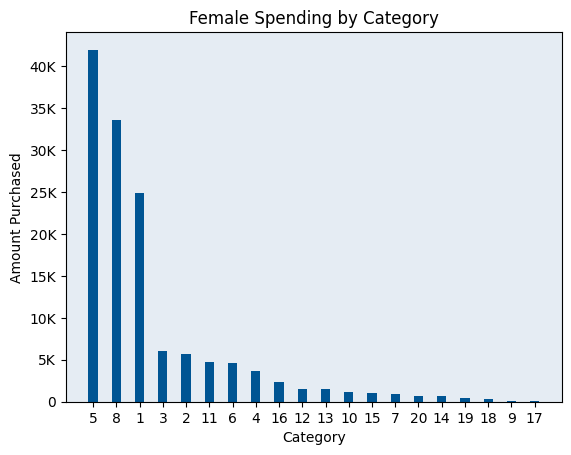

In [238]:
bar_chart(range(len(fem_popular_category)), fem_popular_category['count'],
          fem_popular_category['product_category'], "Female Spending by Category", "Category", "Amount Purchased")

plt.savefig('results/category_fem_spending_bar.png')

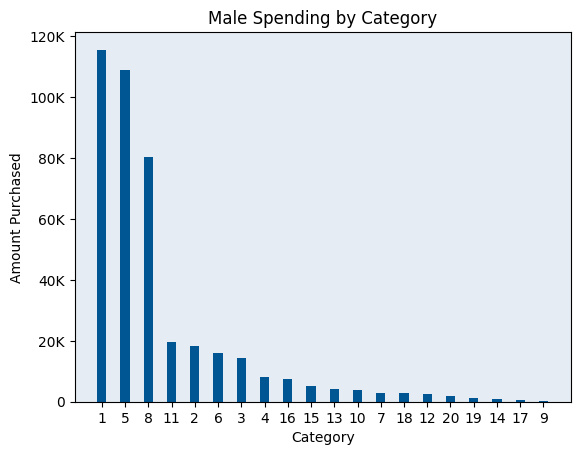

In [239]:
male_popular_category = count_occurrences(bf_sales, 'product_category', 'gender', "M")

bar_chart(range(len(male_popular_category)), male_popular_category['count'],
          male_popular_category['product_category'], "Male Spending by Category", "Category", "Amount Purchased")

plt.savefig('results/category_male_spending_bar.png')